In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df= pd.read_excel(r'C:\Users\mmano\Desktop\ML_Projects\Task3_ML\Task____students_performance_dataset.xlsx')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Student_ID'].min()} to {df['Student_ID'].max()}")

Dataset loaded successfully!
Dataset shape: (300, 20)
Date range: S1000 to S1299


In [4]:
print("Dataset Overview:")
df.head()

Dataset Overview:


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300 non-null    fl

In [6]:
df.isnull().sum()

Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64

In [7]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print(df.head())

   Student_ID  Gender  Study_Hours_per_Week  Attendance_Percentage  \
0           0       1             36.330635              86.628815   
1           1       0              9.582476              73.504255   
2           2       1              5.795795              65.453321   
3           3       1             19.578110              94.381263   
4           4       1             39.426018              46.671849   

   Previous_Sem_Score  Parental_Education  Internet_Access  Family_Income  \
0           38.182863                   2                0   32727.500387   
1           95.788249                   1                0   42332.567312   
2           73.939564                   1                1   44142.273093   
3           53.443393                   0                1   64498.434188   
4           39.749045                   2                0   42105.884774   

   Tutoring_Classes  Sports_Activity  Extra_Curricular  School_Type  \
0                 0                1         

In [8]:
df.drop(columns=['Student_ID'], inplace=True)
df.head()

,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,1,36.330635,86.628815,38.182863,2,0,32727.500387,0,1,0,0,6.777112,2.488956,4.526416,1.698767,2,9.416549,4,44.293533
1,0,9.582476,73.504255,95.788249,1,0,42332.567312,0,1,0,0,6.631231,2.192993,5.920305,8.459841,1,4.382245,4,42.749974
2,1,5.795795,65.453321,73.939564,1,1,44142.273093,0,0,1,0,5.311059,0.887486,5.788195,4.140011,1,7.373097,5,29.846049
3,1,19.578110,94.381263,53.443393,0,1,64498.434188,0,0,1,0,6.380781,1.267095,6.313880,5.694395,2,5.281190,6,44.030395
4,1,39.426018,46.671849,39.749045,2,0,42105.884774,0,0,1,0,4.266327,0.397970,1.551979,8.150371,3,7.069597,6,42.548877


In [9]:
x=df.drop(columns=['Final_Score'])
y=df['Final_Score']
print(f"Features Selected: {len(x)} columns")
print("Target variable: Final Score ")

Features Selected: 300 columns
Target variable: Final Score 


In [10]:
print(x)
print(y)

     Gender  Study_Hours_per_Week  Attendance_Percentage  Previous_Sem_Score  \
0         1             36.330635              86.628815           38.182863   
1         0              9.582476              73.504255           95.788249   
2         1              5.795795              65.453321           73.939564   
3         1             19.578110              94.381263           53.443393   
4         1             39.426018              46.671849           39.749045   
..      ...                   ...                    ...                 ...   
295       0             37.889943              93.974474           73.110423   
296       0             39.440043              63.033473           46.307163   
297       1             30.135127              72.613172           31.708055   
298       1             15.050383              94.388327           90.906921   
299       0              3.340029              77.454280           31.488859   

     Parental_Education  Internet_Acces

In [11]:
print("Features used in model:")
for i, col in enumerate(x, 1):
    print(f"{i:2d}. {col}")

Features used in model:
 1. Gender
 2. Study_Hours_per_Week
 3. Attendance_Percentage
 4. Previous_Sem_Score
 5. Parental_Education
 6. Internet_Access
 7. Family_Income
 8. Tutoring_Classes
 9. Sports_Activity
10. Extra_Curricular
11. School_Type
12. Sleep_Hours
13. Travel_Time
14. Test_Anxiety_Level
15. Peer_Influence
16. Teacher_Feedback
17. Motivation_Level
18. Library_Usage_per_Week


In [12]:
print("Target Variable (Final_Score) Statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")
print(f"Std Dev: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")

Target Variable (Final_Score) Statistics:
Mean: 41.45
Median: 41.60
Std Dev: 9.99
Min: 17.92
Max: 67.30


In [13]:
print("Top 10 Features Correlated with Final Score:")
correlations = df[x.columns.tolist() + ['Final_Score']].corr()['Final_Score'].sort_values(ascending=False)
print(correlations.head(11)[1:])


Top 10 Features Correlated with Final Score:
Previous_Sem_Score       0.632940
Study_Hours_per_Week     0.464599
Attendance_Percentage    0.335473
Family_Income            0.090093
Teacher_Feedback         0.079710
Extra_Curricular         0.025958
Sleep_Hours              0.021040
School_Type              0.001950
Gender                  -0.005002
Internet_Access         -0.013847
Name: Final_Score, dtype: float64


In [14]:
print(x)

     Gender  Study_Hours_per_Week  Attendance_Percentage  Previous_Sem_Score  \
0         1             36.330635              86.628815           38.182863   
1         0              9.582476              73.504255           95.788249   
2         1              5.795795              65.453321           73.939564   
3         1             19.578110              94.381263           53.443393   
4         1             39.426018              46.671849           39.749045   
..      ...                   ...                    ...                 ...   
295       0             37.889943              93.974474           73.110423   
296       0             39.440043              63.033473           46.307163   
297       1             30.135127              72.613172           31.708055   
298       1             15.050383              94.388327           90.906921   
299       0              3.340029              77.454280           31.488859   

     Parental_Education  Internet_Acces

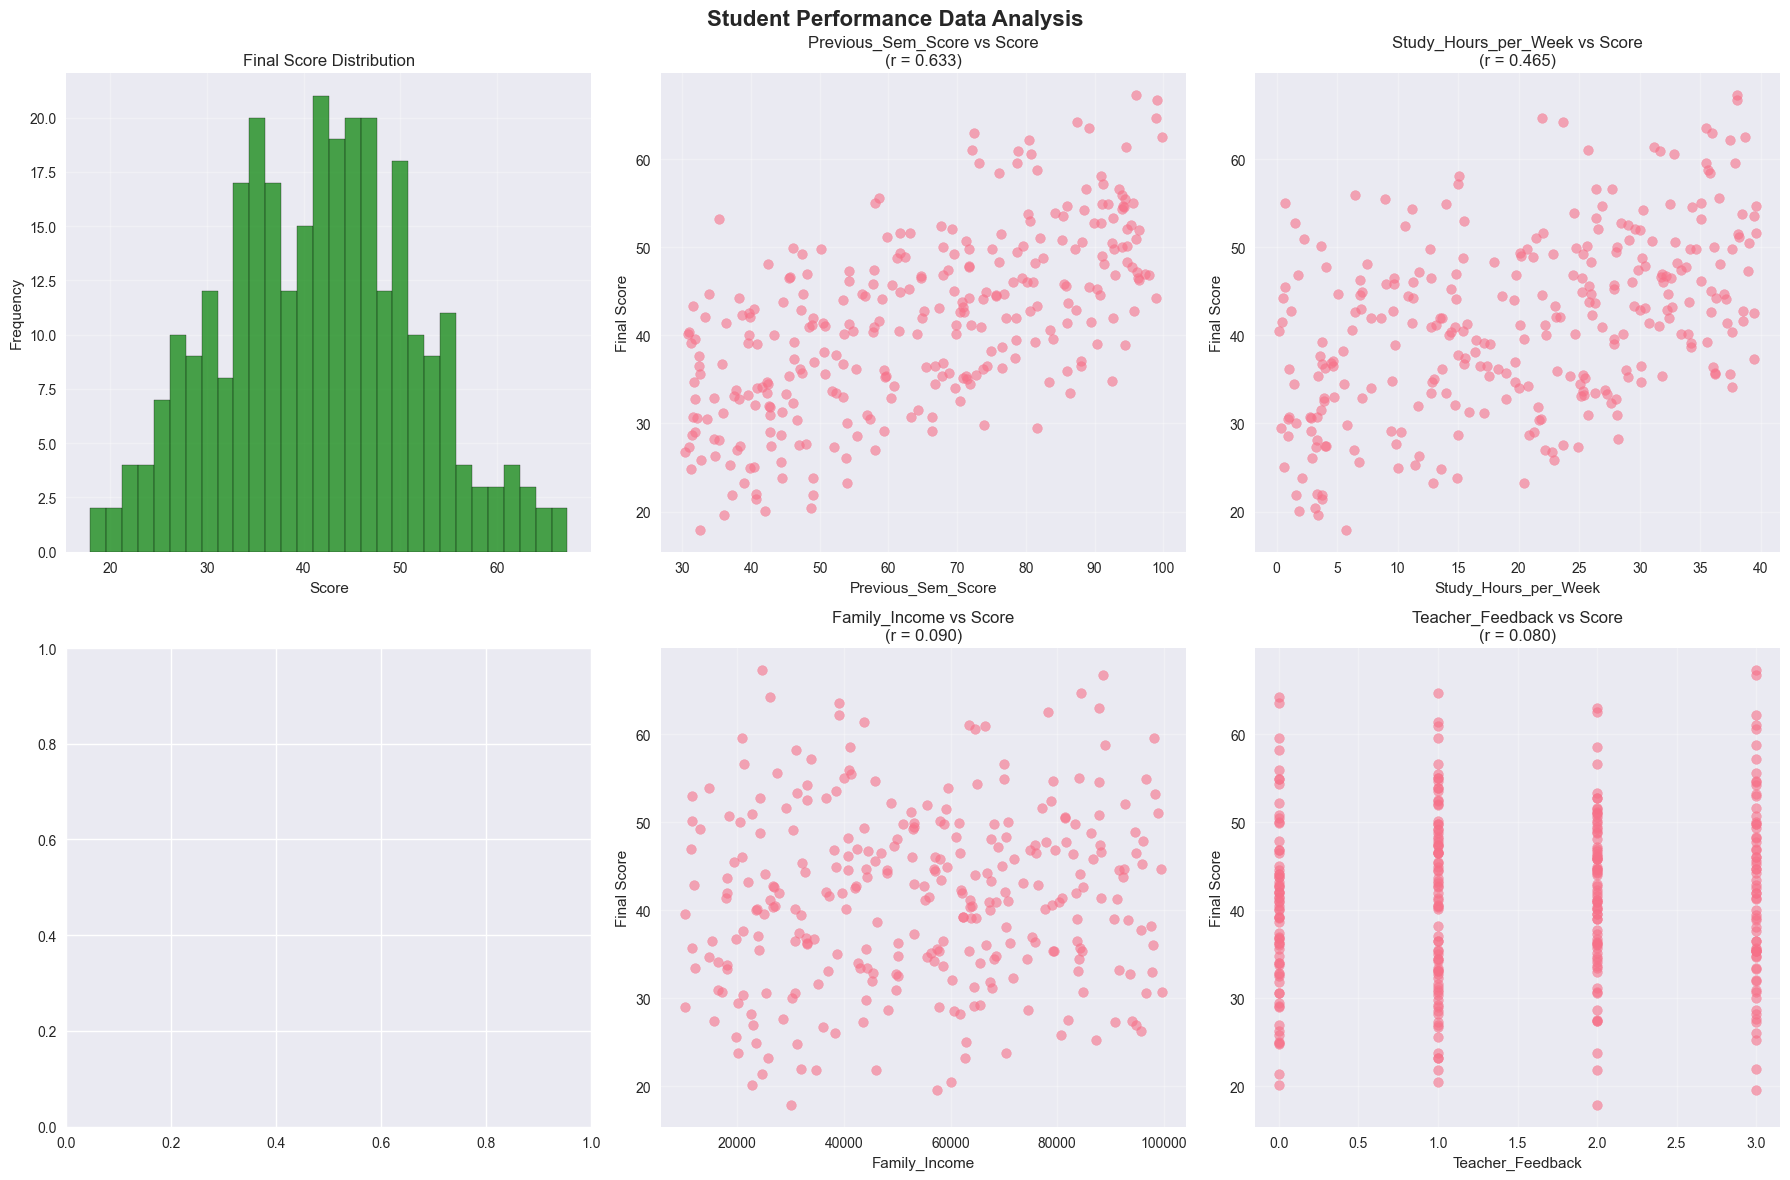

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Student Performance Data Analysis', fontsize=16, fontweight='bold')

axes[0, 0].hist(y, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0, 0].set_title('Final Score Distribution')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)
top_features = correlations.head(6)[1:].index
for i, feature in enumerate(top_features):
    if i < 5:
        row = i // 3
        col = (i + 1) % 3
        if row == 0 and col == 0:
            continue
        axes[row, col].scatter(df[feature], y, alpha=0.6)
        axes[row, col].set_title(f'{feature} vs Score\n(r = {correlations[feature]:.3f})')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Final Score')
        axes[row, col].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Top 10 Features for Heatmap: ['Previous_Sem_Score', 'Study_Hours_per_Week', 'Attendance_Percentage', 'Family_Income', 'Teacher_Feedback', 'Extra_Curricular', 'Sleep_Hours', 'School_Type', 'Gender', 'Internet_Access']


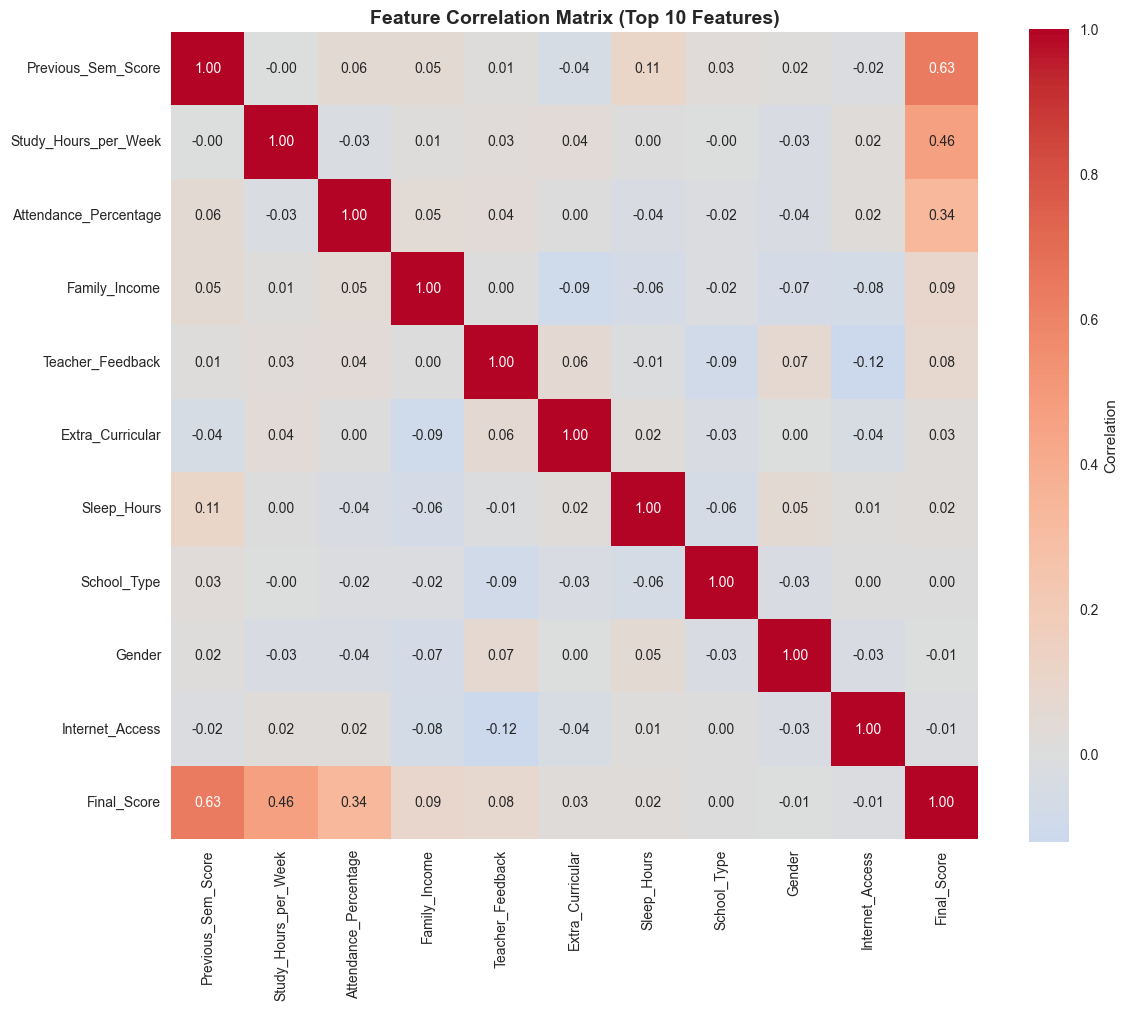

In [16]:
plt.figure(figsize=(12, 10))
important_features = correlations.head(11)[1:].index[:10]
print(f"Top 10 Features for Heatmap: {list(important_features)}")
corr_matrix = df[list(important_features) + ['Final_Score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix (Top 10 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=None)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 240 samples
Test set: 60 samples


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-1.06013858  0.42177358 -1.06736812 ... -0.41870217 -0.82508692
  -0.18015441]
 [ 0.94327291 -1.16784504  0.8329788  ... -0.41870217 -0.55438455
   0.18318222]
 [ 0.94327291  0.56844057 -1.61378556 ...  0.49482983 -1.58338254
  -1.27016429]
 ...
 [-1.06013858  1.4649556  -1.19365911 ... -1.33223416  0.80893518
  -1.27016429]
 [-1.06013858  0.97402804  1.56122378 ... -0.41870217 -0.20195464
   0.90985547]
 [-1.06013858  1.17626448  0.2376555  ... -1.33223416 -0.71065798
   1.27319209]]
[[ 0.94327291 -1.16062463  0.90052137 ... -1.33223416  0.96227984
  -0.54349104]
 [-1.06013858 -0.71825268  1.19226995 ...  1.40836183 -0.92454037
  -1.63350091]
 [ 0.94327291  0.12191207 -1.04639668 ... -1.33223416 -0.8813718
  -1.63350091]
 ...
 [-1.06013858  1.39266106 -0.86955155 ... -0.41870217 -1.34093954
  -0.54349104]
 [ 0.94327291 -1.12576006 -0.92844521 ... -1.33223416  1.53403973
  -0.18015441]
 [-1.06013858 -1.12180563  1.74831683 ...  0.49482983 -1.08102335
   0.90985547]]


In [19]:
selector = SelectKBest(score_func=f_regression, k=10) 
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = x.columns[selector.get_support()]
print(f"Feature Selection: Top {len(selected_features)} features selected")
print("Selected features:", list(selected_features))

Feature Selection: Top 10 features selected
Selected features: ['Study_Hours_per_Week', 'Attendance_Percentage', 'Previous_Sem_Score', 'Parental_Education', 'Sports_Activity', 'Travel_Time', 'Test_Anxiety_Level', 'Peer_Influence', 'Teacher_Feedback', 'Library_Usage_per_Week']


In [20]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
print(model)

LinearRegression()


In [22]:
X_test_selected = selector.transform(X_test_scaled)
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

In [23]:
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{dataset_name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

In [24]:
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Test")

Training Set Performance:
R² Score: 0.7415
RMSE: 5.07
MAE: 4.09
MAPE: 10.73%
Test Set Performance:
R² Score: 0.6101
RMSE: 6.05
MAE: 4.87
MAPE: 11.46%


In [25]:
print(f"Overfitting Check:")
print(f"R² difference (Train - Test): {train_metrics['R2'] - test_metrics['R2']:.4f}")
if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    print("Model appears to generalize well (low overfitting)")
else:
    print("Potential overfitting detected")

Overfitting Check:
R² difference (Train - Test): 0.1313
Potential overfitting detected


In [26]:
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)
print(f"Feature Importance (Top 10):")
print(feature_importance.head(10))

Feature Importance (Top 10):
                  Feature  Coefficient  Abs_Coefficient
2      Previous_Sem_Score     6.104323         6.104323
0    Study_Hours_per_Week     4.711425         4.711425
1   Attendance_Percentage     3.024046         3.024046
5             Travel_Time    -0.493945         0.493945
9  Library_Usage_per_Week    -0.444128         0.444128
8        Teacher_Feedback     0.405124         0.405124
7          Peer_Influence    -0.336422         0.336422
6      Test_Anxiety_Level    -0.251966         0.251966
4         Sports_Activity    -0.172060         0.172060
3      Parental_Education     0.045205         0.045205


In [27]:
print(f"Intercept: {model.intercept_:.2f}")

Intercept: 40.92


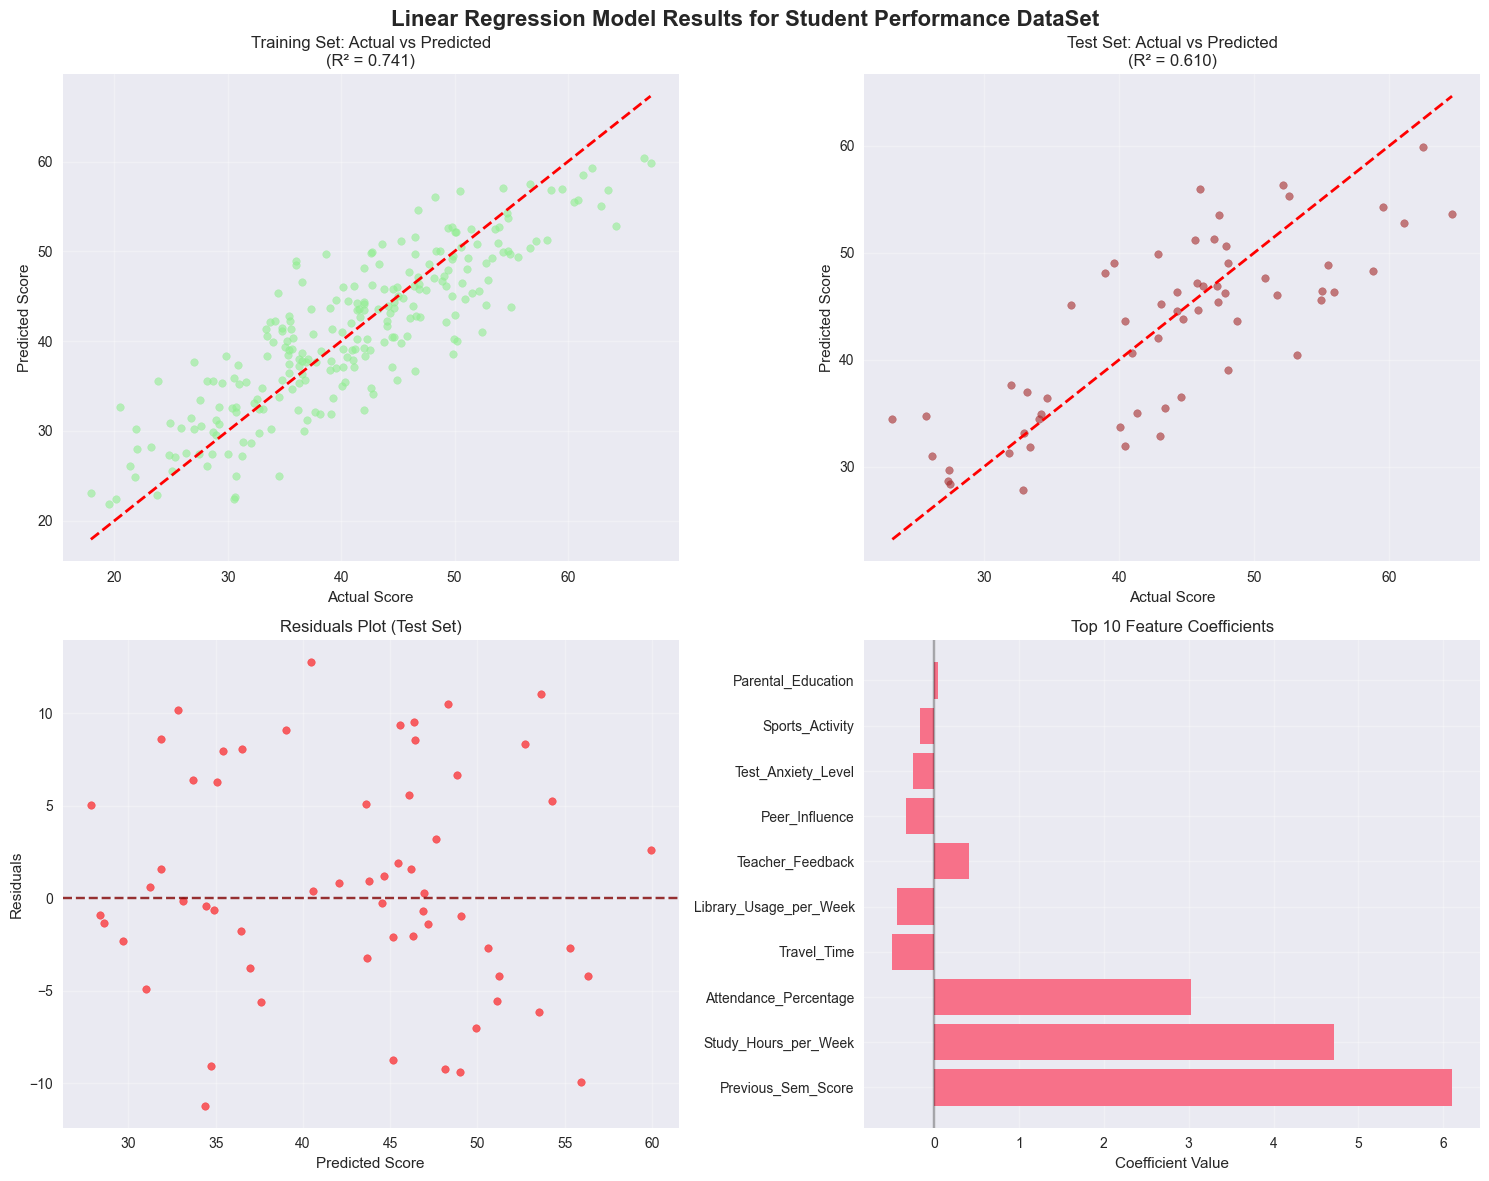

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Model Results for Student Performance DataSet', fontsize=16, fontweight='bold')
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.6, color='lightgreen', s=30)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Score')
axes[0, 0].set_ylabel('Predicted Score')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\n(R² = {train_metrics["R2"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.6, color='brown', s=30)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Score')
axes[0, 1].set_ylabel('Predicted Score')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\n(R² = {test_metrics["R2"]:.3f})')
axes[0, 1].grid(True, alpha=0.3)
residuals_test = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.6, color='red', s=30)
axes[1, 0].axhline(y=0, color='maroon', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted Score')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot (Test Set)')
axes[1, 0].grid(True, alpha=0.3)
top_features_plot = feature_importance.head(10)
axes[1, 1].barh(range(len(top_features_plot)), top_features_plot['Coefficient'])
axes[1, 1].set_yticks(range(len(top_features_plot)))
axes[1, 1].set_yticklabels(top_features_plot['Feature'])
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title('Top 10 Feature Coefficients')
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
print("Example Scenario:")
new_student_full_features = pd.DataFrame(0.0, index=[0], columns=x.columns)
new_student_input_values = {
    'Study_Hours_per_Week': 30.0,
    'Attendance_Percentage': 90.0,
    'Previous_Sem_Score': 75.0,
    'Parental_Education': 1,
    'Sports_Activity': 0,
    'Test_Anxiety_Level': 6.5,
    'Teacher_Feedback': 2,
    'Library_Usage_per_Week': 7
}
for feature, value in new_student_input_values.items():
    if feature in new_student_full_features.columns:
        new_student_full_features.loc[0, feature] = value
    else:
        print(f"Warning: Feature '{feature}' not found in model's expected features.")


new_student_full_features = new_student_full_features[x.columns]
new_student_scaled = scaler.transform(new_student_full_features)
new_student_scaled = np.nan_to_num(new_student_scaled, nan=0.0, posinf=0.0, neginf=0.0)
new_student_selected = selector.transform(new_student_scaled)

predicted_score = model.predict(new_student_selected)
print("Predicted Final Score:", predicted_score[0])

Example Scenario:
Predicted Final Score: 53.63196949885847


In [30]:
print("Model Summary:")
print(f"Model successfully trained on {len(X_train)} samples")
print(f"Test R² Score: {test_metrics['R2']:.4f}")
print(f"Test RMSE: {test_metrics['RMSE']:.2f}")
print(f"Model can predict Student's final score with {test_metrics['R2']*100:.1f}% accuracy")
print(f"Most important factor: {feature_importance.iloc[0]['Feature']}")

Model Summary:
Model successfully trained on 240 samples
Test R² Score: 0.6101
Test RMSE: 6.05
Model can predict Student's final score with 61.0% accuracy
Most important factor: Previous_Sem_Score


In [32]:
import joblib
joblib.dump(model,"Student_model.pkl")
joblib.dump(scaler,"Performance_scaler.pkl")
joblib.dump(selector,"Selected_features.pkl")
joblib.dump(X_train,"Input_values.pkl")

print("All pkl Files saved")

All pkl Files saved
